In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from math import *

In [2]:
G = 6.67e-11
R = 1e5               ## Radio del objeto
M = 1e3                ## Masa del objeto
v = (4*pi*R**3)/3      ## Volumen del objeto
d = M/v                ## Densidad del objeto

In [3]:
def f(x):                                ## Potencial Teorico
    f = (2*pi*G*d/3)*(x**2 - 3*R**2)
    return f

In [4]:
def e(n):                       ## Primer Metodo
    dr = R/(n-1)
    
    # Set up variables
    
    r = np.zeros(n)               ## Posicion de r
    z = np.zeros(n)               ## Derivada del potencial
    f = np.zeros(n)               ## Potencial
    f_s = - (G*M)/R
    h = np.ones(n)*d              ## Densidad de masa
     
    # Set up central values (initial values)
    
    r[0] = 0.0
    z[0] = 0.0
    f[0] = 0.0
    
    for i in range(1,n):
        
        r[i] = dr * i
        f[i] = f[i-1] + z[i-1]*dr
        z[i] = z[i-1] + (4.0*pi*G*d - 2*z[i-1]/r[i])*dr
    
    f_c = f_s - f[n-1]             ## Se halla la diferencia para poder hallar + C
    f = f + f_c                    ## Aca se corrige
    return(r,z,f) 

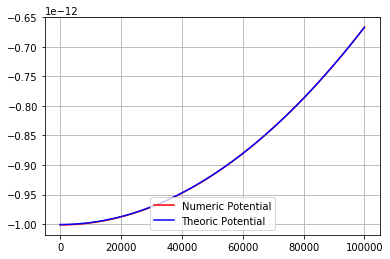

In [5]:
plt.grid()

plt.plot(e(500)[0],e(500)[2],'r')
plt.plot(e(500)[0],f(e(500)[0]),'b')
plt.legend(('Numeric Potential', 'Theoric Potential'),prop = {'size':10}, loc = 'lower center')

In [6]:
def mm(n):                                 ## Segundo Metodo
    
    x = (n-1)/R        ## dr = R/(n-1)
    
    # Set up variables
    
    j = np.zeros((n,n))                
    b = np.zeros(n)                ## Vector b
    r = np.zeros(n)                ## Vector de posicion    
    h = np.ones(n)*d               ## Vector densidad
    
    f_s = - (G*M)/R
    
    for q in range (0,n):   
        
        b[q] = 4*pi*G*h[q]
    
    for i in range (0,n):
        
        if i == 0:
           r[i] = 1/(2*x)       ## Corrimiento de la malla en r=0
        else :
           r[i] =  i/x          ## Enmallado para i > 0
    
    
    for k in range(0,n):                      ## Matriz A del sistema
        for l in range (0,n):
            if k == l and k == 0:
               j[k][l] = -(x**2) - (x/r[k])
            elif k == l and  k != 0:
               j[k][l] = -2*(x**2)
            elif k+1 == l:
               j[k][l] =  x**2 + (x/r[k]) 
            elif k == l+1:
               j[k][l] = x**2 - (x/r[k])
            else:
               j[k][l] = 0.0
    
    f = np.linalg.solve(j,b)
    
    f_c = f_s - f[n-1]             ## Se halla la diferencia para poder hallar + C
    f = f + f_c                    ## Aca se corrige

    return(r,f)
    

    

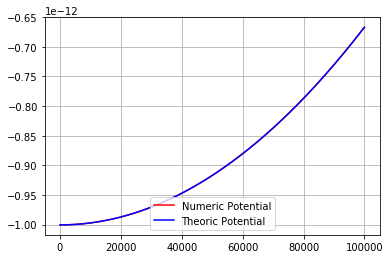

In [7]:
plt.grid()

plt.plot(mm(1000)[0],mm(1000)[1],'r')
plt.plot(mm(1000)[0],f(mm(1000)[0]),'b')
plt.legend(('Numeric Potential', 'Theoric Potential'),prop = {'size':10}, loc = 'lower center')